In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
sns.set_style('darkgrid')        # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

pastel_colors = sns.color_palette('pastel')
deep_colors = sns.color_palette('deep')
set2_colors = sns.color_palette('Set2')

In [7]:
train_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/train_dataset.csv')
test_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/test_dataset.csv')

In [4]:
test_df['attack_cat'][test_df['attack_cat'] != 'Normal'].value_counts()

Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [17]:
#whole_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/whole_dataset.csv')
whole_df = pd.concat(map(pd.read_csv, ['/Users/tomasroncak/Documents/diplomova_praca/data/original/UNSW-NB15_1.csv', 
                                          '/Users/tomasroncak/Documents/diplomova_praca/data/original/UNSW-NB15_2.csv', 
                                          '/Users/tomasroncak/Documents/diplomova_praca/data/original/UNSW-NB15_3.csv', 
                                          '/Users/tomasroncak/Documents/diplomova_praca/data/original/UNSW-NB15_4.csv']), ignore_index=True)
whole_df['attack_cat'] = whole_df['attack_cat'].str.strip().replace('Backdoor', 'Backdoors')

/var/folders/p_/sqhqkt695nz591qr4521z14w0000gn/T/ipykernel_95370/993141175.py:2: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_df = pd.concat(map(pd.read_csv, ['/Users/tomasroncak/Documents/diplomova_praca/data/original/UNSW-NB15_1.csv',
/var/folders/p_/sqhqkt695nz591qr4521z14w0000gn/T/ipykernel_95370/993141175.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_df = pd.concat(map(pd.read_csv, ['/Users/tomasroncak/Documents/diplomova_praca/data/original/UNSW-NB15_1.csv',


In [96]:
benign_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/processed_anomaly/180.0/extracted_datasets/Benign_dataset.csv')
analysis_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/processed_anomaly/180.0/extracted_datasets/Analysis_dataset.csv')

In [101]:
import os
for dirname, _, filenames in os.walk('/Users/tomasroncak/Documents/UNSW-NB15/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/tomasroncak/Documents/UNSW-NB15/UNSW-NB15_3.csv
/Users/tomasroncak/Documents/UNSW-NB15/UNSW-NB15_2.csv
/Users/tomasroncak/Documents/UNSW-NB15/UNSW-NB15_1.csv
/Users/tomasroncak/Documents/UNSW-NB15/UNSW-NB15_4.csv
/Users/tomasroncak/Documents/UNSW-NB15/UNSW-NB15_features.csv
/Users/tomasroncak/Documents/UNSW-NB15/UNSW_NB15_testing-set.csv
/Users/tomasroncak/Documents/UNSW-NB15/UNSW-NB15_LIST_EVENTS.csv
/Users/tomasroncak/Documents/UNSW-NB15/UNSW_NB15_training-set.csv
/Users/tomasroncak/Documents/UNSW-NB15/raw_1.pcap


In [117]:
whole_df.shape

(2540047, 49)

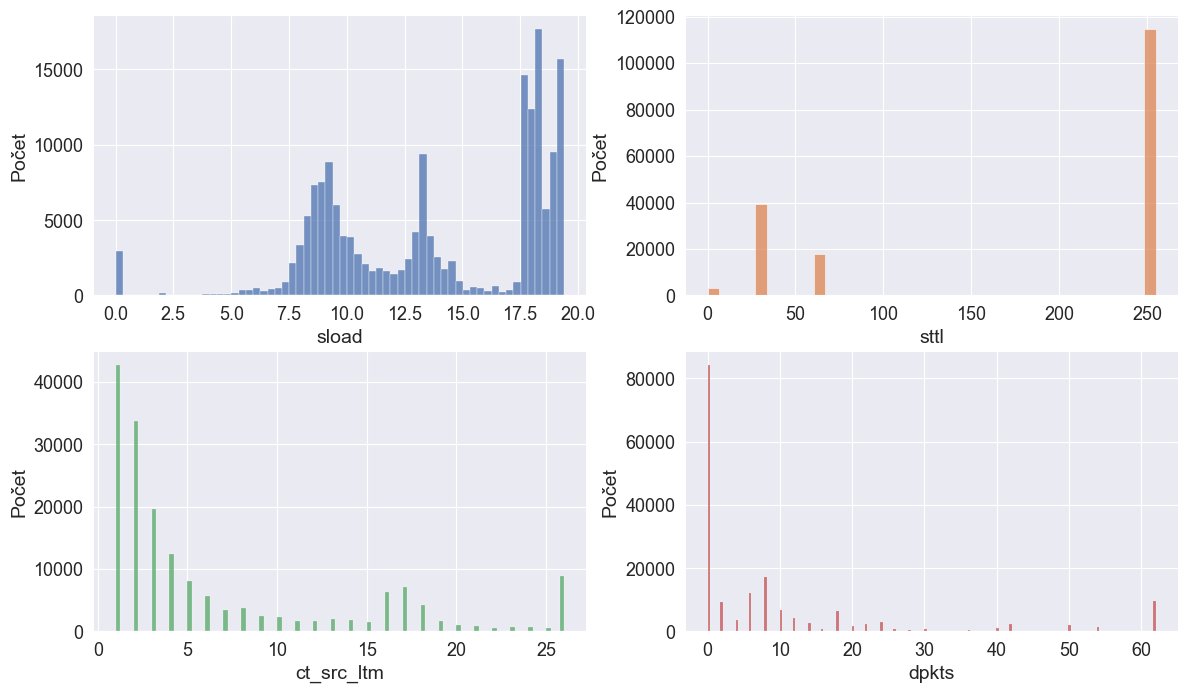

In [13]:
f, axes = plt.subplots(2, 2)
[ax.set(ylabel='Počet') for ax in axes.flat]

sns.histplot(train_df['sload'], ax=axes[0,0], color = deep_colors[0])
sns.histplot(train_df['sttl'], ax=axes[0,1], color = deep_colors[1])
sns.histplot(train_df['ct_src_ltm'], ax=axes[1,0], color = deep_colors[2])
sns.histplot(train_df['dpkts'], ax=axes[1,1], color = deep_colors[3])
f.set_figwidth(14)
f.set_figheight(8)

In [14]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
standard_scaler = StandardScaler()

numeric_cols = train_df.select_dtypes(include=[np.number]).columns

#X = minmax_scaler.fit_transform(train_df[numeric_cols])
X = standard_scaler.fit_transform(train_df[numeric_cols])

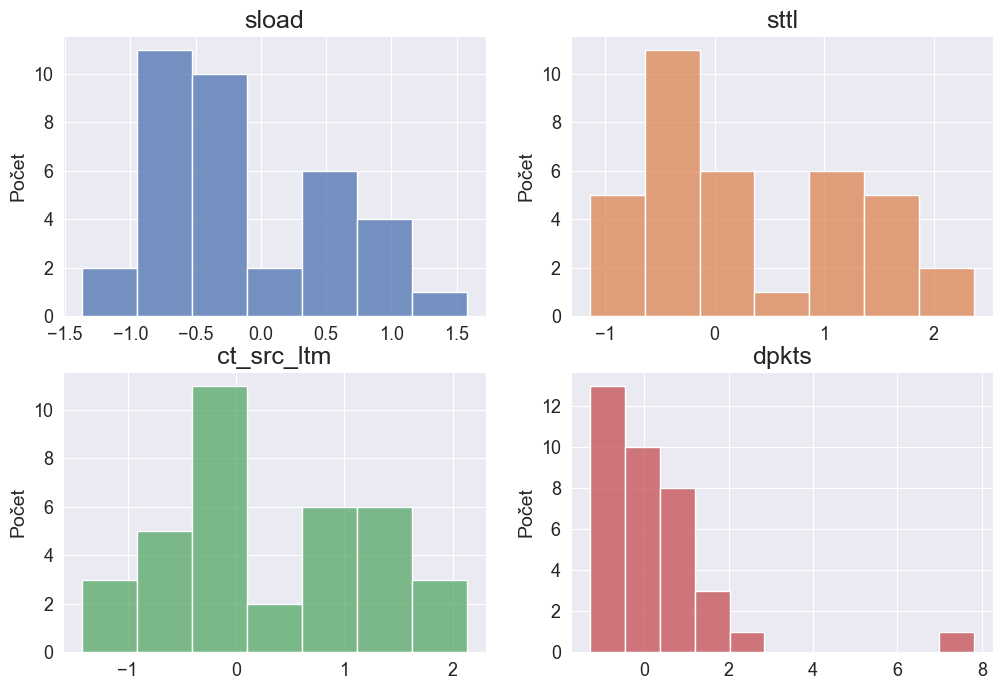

In [15]:
f, axes = plt.subplots(2, 2)
[ax.set(ylabel='Počet') for ax in axes.flat]

sns.histplot(X[0], ax=axes[0,0], color = deep_colors[0])
sns.histplot(X[1], ax=axes[0,1], color = deep_colors[1])
sns.histplot(X[2], ax=axes[1,0], color = deep_colors[2])
sns.histplot(X[3], ax=axes[1,1], color = deep_colors[3])

axes[0, 0].set_title('sload')
axes[0, 1].set_title('sttl')
axes[1, 0].set_title('ct_src_ltm')
axes[1, 1].set_title('dpkts')
f.set_figwidth(12)
f.set_figheight(8)

In [18]:
def calculate_percentage(attack_types_and_sums, decimal):
    percentage = []
    for cat in attack_types_and_sums:
        pct = (cat / attack_types_and_sums.sum()) * 100
        percentage.append(round(pct, decimal))
    return percentage

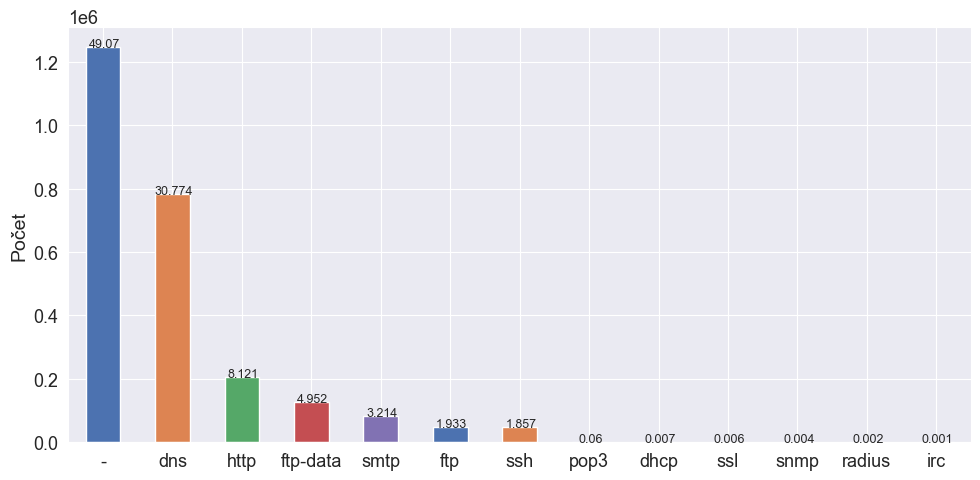

In [20]:
plt.figure(figsize=(10,5), tight_layout=True)
plt.ylabel('Počet')

ax = whole_df['service'].value_counts().plot(kind='bar', color=deep_colors[:5], rot=0)
percentage = calculate_percentage(whole_df.service.value_counts(), 3)
for idx, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2 + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage[idx], (x, y), size = 9, ha='center')
    idx += 1

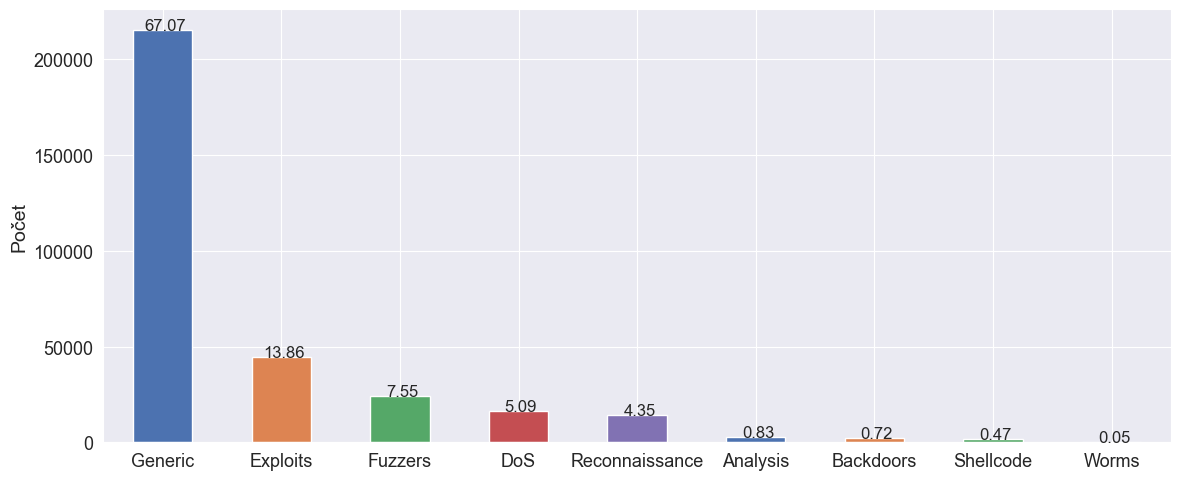

In [21]:
plt.figure(figsize=(12,5), tight_layout=True)
plt.ylabel('Počet')

ax = whole_df['attack_cat'][whole_df['attack_cat'] != 'Normal'].value_counts().plot(kind='bar', color=deep_colors[:5], rot=0)

percentage = calculate_percentage(whole_df.attack_cat.value_counts(), 2)
for idx, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2 + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage[idx], (x, y), size = 12, ha='center')
    idx += 1

Text(0, 0.5, 'Označenie')

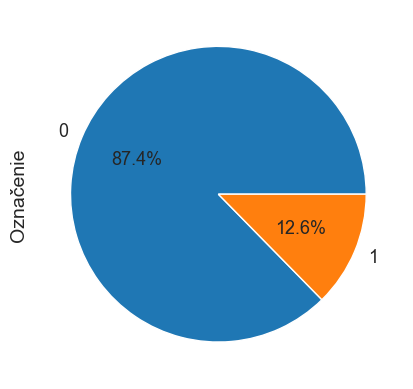

In [23]:
whole_df['Label'].value_counts().plot.pie(autopct='%1.1f%%') # pocet utokov a benignych tokov
plt.ylabel('Označenie')

/var/folders/p_/sqhqkt695nz591qr4521z14w0000gn/T/ipykernel_50460/1552377911.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = whole_df.corr()


<AxesSubplot: >

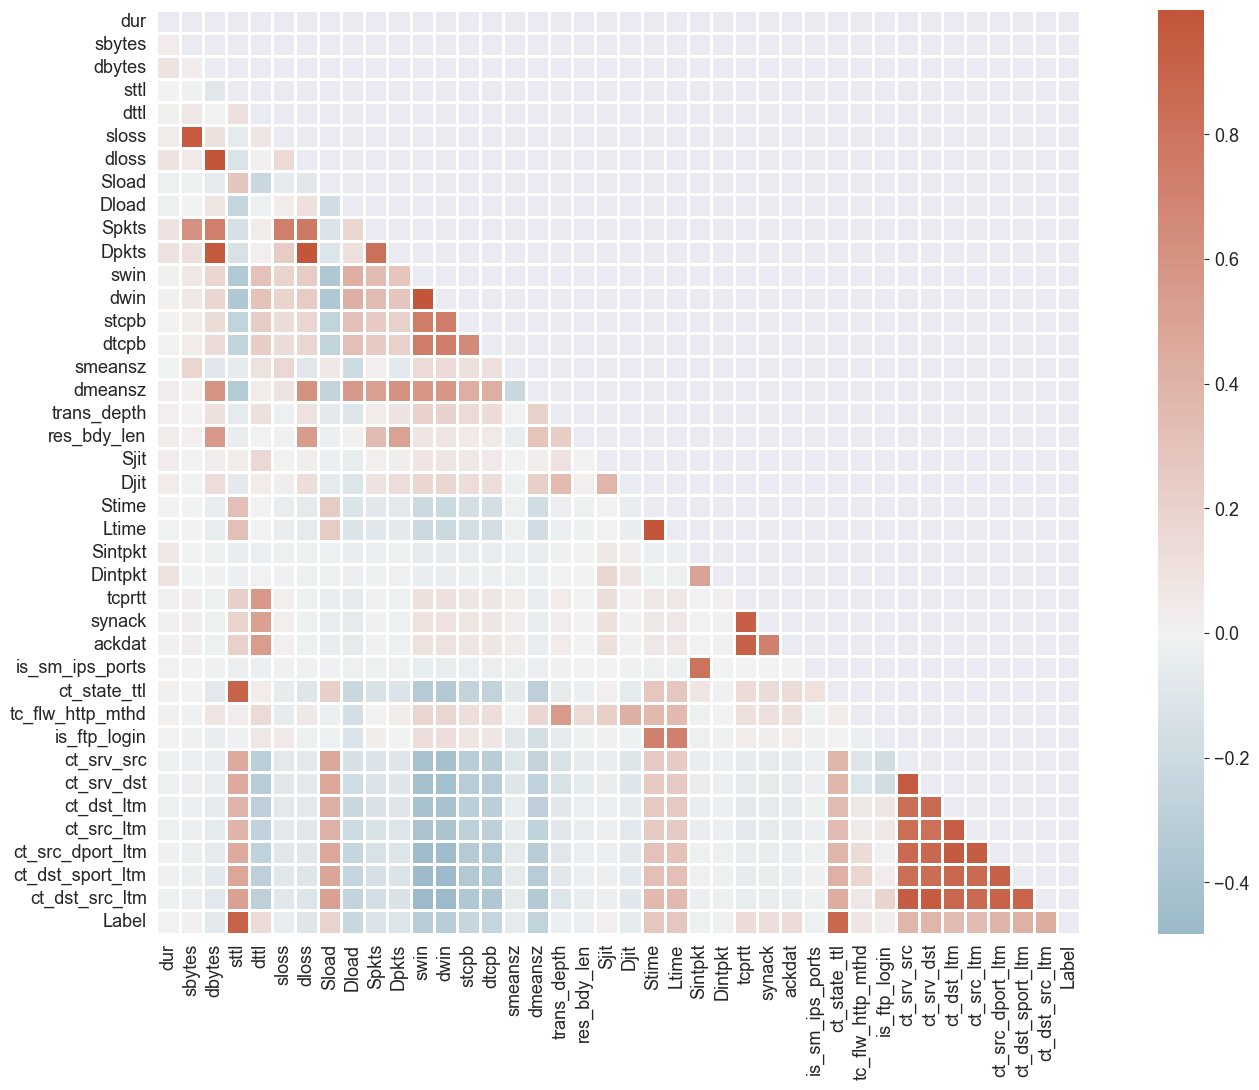

In [20]:
corr = whole_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(20,12))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=1.)